Adding layers using hand-type data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#A Batch of data
inputs = [[1, 2, 3, 2.5],
          [2., 5., -1., 2],
          [-1.5, 2.7, 3.3, -0.8]]

weights1 = [[0.2, 0.8, -0.5, 1],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]]

biases1 = [2, 3, 0.5]

weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]

biases2 = [-1, 2, -0.5]

In [3]:
layer1_outputs = np.dot(inputs,np.array(weights1).T) + biases1

In [4]:
layer2_outputs = np.dot(layer1_outputs,np.array(weights2).T) + biases2

In [5]:
layer2_outputs

array([[ 0.5031 , -1.04185, -2.03875],
       [ 0.2434 , -2.7332 , -5.7633 ],
       [-0.99314,  1.41254, -0.35655]])

The <b>nnfs package</b> contains functions that we can use to create data.

In [6]:
!pip install nnfs

In [16]:
from nnfs.datasets import spiral_data
import nnfs

"""
The spiral_data function allows us to create a dataset with as many classes as we want. The function has parameters
to choose the number of classes and the number of points/observations per class in the resulting non-linear dataset.

The nnfs.init() does three things: it sets the random seed to 0 (by the default), creates a float32 dtype default,
and overrides the original dot product from NumPy
"""

nnfs.init()

In [22]:
X, y = spiral_data(samples = 100,classes=3)
#X
#y

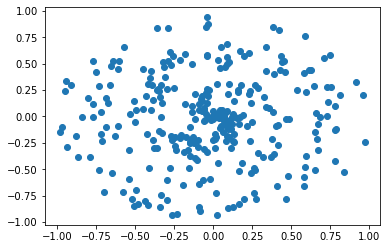

In [14]:
plt.scatter(X[:,0],X[:,1])
plt.show()

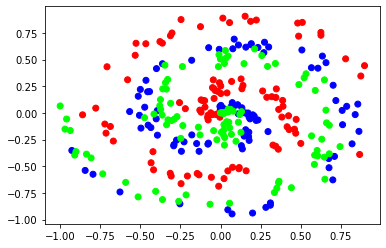

In [24]:
"""
Adding color to the graph makes more sense now to visualize the spiral of 3 classes. Neural network will not be aware 
of the color differences as the data have no class encodings. This is only made as an instruction for the viewers.
"""
plt.scatter(X[:,0],X[:,1],c = y, cmap='brg')
plt.show()

In [29]:
"""
np.random.randn produces a Gaussian distribution with a mean of 0 and a variance of 1.  In general, neural networks work best
with values between -1 and +1.
"""
np.random.randn(3,4)

array([[ 0.60512006,  0.895556  , -0.13190864,  0.40476182],
       [ 0.22384356,  0.32962298,  1.285984  , -1.5069984 ],
       [ 0.67646074, -0.38200897, -0.22425893, -0.30224973]],
      dtype=float32)

In [32]:
np.zeros((1,4))

array([[0., 0., 0., 0.]], dtype=float32)

Adding layers using a Class

In [49]:
"""
We multiply these weights with a small value so that our network takes less time to train.

We’re initializing weights to be (inputs, neurons), rather than (neurons, inputs). We’re doing this ahead instead of
transposing every time we perform a forward pass.

We initialize the biases in the shape of (1,n) a row vector so that it gets easier when adding to the dot product.
"""

class Dense_Layer:
    def __init__(self,n_inputs,n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1,n_neurons))
    
    def forward_pass(self,inputs):
        self.output = np.dot(inputs,self.weights) + self.biases

In [50]:
X, y = spiral_data(samples = 100, classes=3)

#X.shape[1] gives us 2
dense1 = Dense_Layer(X.shape[1],3)

dense1.forward_pass(X)

print(dense1.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 1.2255914e-04  1.3559773e-04  1.7264958e-05]
 [ 1.7871348e-04  3.3583675e-04  6.7582834e-05]
 [ 5.0059665e-04 -8.6351785e-05 -1.2605808e-04]
 [ 6.1262655e-04  3.2750986e-04 -2.1257403e-05]]
